# Cell community identification using the hoodscanR package 
## Why do we identify the cell community
To understand the structure-function relationship of a tissue, the concept of tissue cellular neighborhoods (TCNs), niches or cell community has been proposed as a recurrent functional unit in which different cell types organize themselves to support tissue functions. 

Understanding the complexities of cell community is critical for advancing our knowledge of tissue biology and developing novel therapeutic strategies for various diseases.

## What is CosMx data
[CosMx™ Spatial Molecular Imager](https://nanostring.com/products/cosmx-spatial-molecular-imager/single-cell-imaging-overview/) is the first fully-integrated multiomics single-cell spatial biology solution and enables researchers to investigate morphologically-intact tissues at unprecedented plex, resolution and cell numbers.

## What tools can we use to run the cell community
- [hoodscanR](https://github.com/DavisLaboratory/hoodscanR)
- [NeighborhoodCoordination](https://github.com/nolanlab/NeighborhoodCoordination)
- [CytoCommunity](https://github.com/huBioinfo/CytoCommunity)
- [nichecompass](https://github.com/Lotfollahi-lab/nichecompass)
- [SPIAT](https://github.com/TrigosTeam/SPIAT)

### What is hoodscanR
hoodscanR is an user-friendly R package providing functions to assist cellular neighborhood analysis of any spatial transcriptomics data with single-cell resolution.

All functions in the package are built based on the *SpatialExperiment* infrastructure, allowing integration into various spatial transcriptomics-related packages from Bioconductor. The package can result in cell-level neighborhood annotation output, along with funtions to perform neighborhood colocalization analysis and neighborhood-based cell clustering.

![image.png](hoodscanR.jpg)


## library packages and load data 

In [1]:
# library and set default parameter 
library(hoodscanR)
library(SpatialExperiment)


Warning message:
“package ‘SpatialExperiment’ was built under R version 4.3.2”
Loading required package: SingleCellExperiment

Warning message:
“package ‘SingleCellExperiment’ was built under R version 4.3.2”
Loading required package: SummarizedExperiment

Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Loading required package: MatrixGenerics

Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Loading required package: matrixStats

Warning message:
“package ‘matrixStats’ was built under R version 4.3.2”

Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,


In [2]:
# set path and load data
output_dir <- '/scratch/project/stseq/Feng/package-vignette/temp-data'
setwd(output_dir)


## load and explore the CosMx data

In [3]:
load('CosMx_Skin_Melanoma.RData')
print(dim(count))
print(dim(spatial))


[1]   960 18246
[1] 18246    24


In [4]:
count[1:5,1:5]

,c_6_1_1,c_6_1_2,c_6_1_3,c_6_1_4,c_6_1_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AATK,0.00000,0,0,0,0.0000000
ABL1,0.00000,0,0,0,0.0000000
ABL2,0.00000,0,0,0,0.7859023
ACE,0.00000,0,0,0,0.0000000
ACE2,1.29686,0,0,0,0.7859023


In [5]:
head(spatial)

,X,sdimx,sdimy,cell_ID,fov,Area,AspectRatio,Width,Height,leiden_clus,⋯,Run_Tissue_name,Panel,Diversity,totalcounts,Slide_name,Run_name,tissue,slide_layout,custom_clust,clust_mel_ref
,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19508,19508,12.71464,-7.92352,c_6_1_1,1,5233,1.92,121,63,5,⋯,48974-2B,980p,146,323,S3,Run1069,48974-2B,48974-2B_Tissue1,KC_Diff,Epithelial cells
19509,19509,12.74416,-7.92334,c_6_1_2,1,4565,1.30,103,79,4,⋯,48974-2B,980p,57,89,S3,Run1069,48974-2B,48974-2B_Tissue1,Pilosebaceous,Keratinocytes
19510,19510,12.67864,-7.92424,c_6_1_3,1,3709,1.58,87,55,10,⋯,48974-2B,980p,120,180,S3,Run1069,48974-2B,48974-2B_Tissue1,Pilosebaceous,Keratinocytes
19511,19511,12.73696,-7.92730,c_6_1_4,1,5356,1.56,134,86,2,⋯,48974-2B,980p,164,351,S3,Run1069,48974-2B,48974-2B_Tissue1,KC_Diff,Keratinocytes
19512,19512,12.66640,-7.92712,c_6_1_5,1,5274,1.85,120,65,2,⋯,48974-2B,980p,230,533,S3,Run1069,48974-2B,48974-2B_Tissue1,KC_Diff,Keratinocytes
19513,19513,12.72184,-7.93288,c_6_1_6,1,3425,0.59,61,104,2,⋯,48974-2B,980p,77,171,S3,Run1069,48974-2B,48974-2B_Tissue1,KC_Diff,Keratinocytes


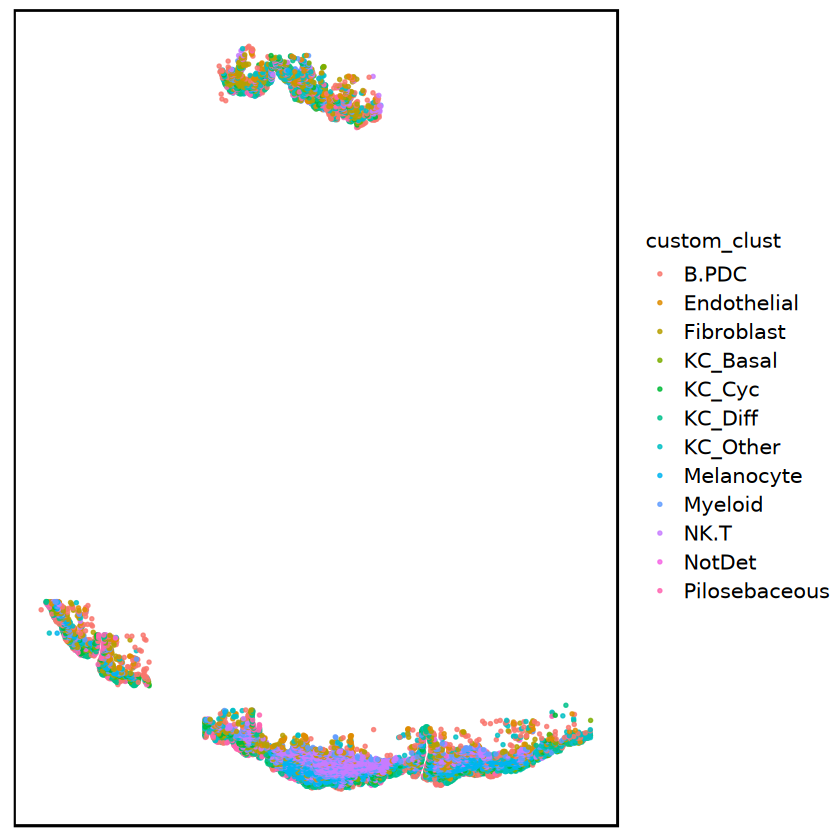

In [6]:
spe <- SpatialExperiment(
    assay = list(counts=count), 
    colData = spatial, 
    rowData = rownames(count),
    spatialCoordsNames = c("sdimx", "sdimy"))
plotTissue(spe, color = custom_clust, size = 0.5, alpha = 0.8)

## convert to SpatialExperiment as input

In [7]:
count_fov <- count[,spatial$fov==12]
spatial_fov <- spatial[spatial$fov==12,]
dim(count_fov)
dim(spatial_fov)

[1]  960 2129

[1] 2129   24

In [8]:
spe <- SpatialExperiment(
    assay = list(counts=count_fov), 
    colData = spatial_fov, 
    rowData = rownames(count_fov),
    spatialCoordsNames = c("sdimx", "sdimy"))


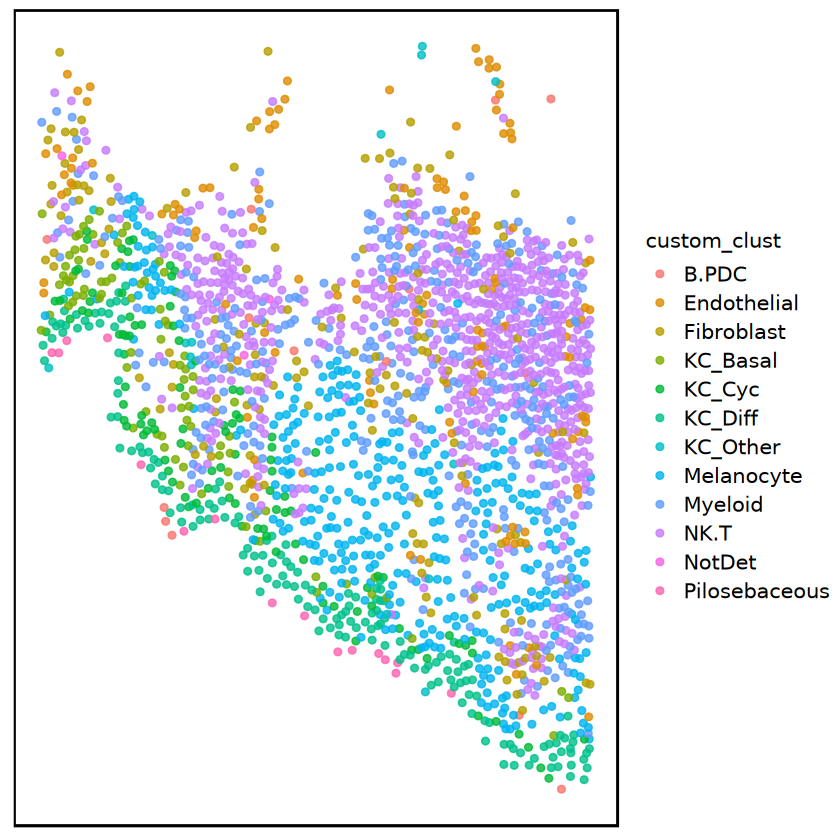

In [9]:
plotTissue(spe, color = custom_clust, size = 1.5, alpha = 0.8)

## cell community analysis

In [10]:
spe <- readHoodData(spe, anno_col = "custom_clust")
fnc <- findNearCells(spe, k = 100) # find 100 nearest cells for each cell
lapply(fnc, function(x) x[1:10, 1:5])

,nearest_cell_1,nearest_cell_2,nearest_cell_3,nearest_cell_4,nearest_cell_5
,<chr>,<chr>,<chr>,<chr>,<chr>
c_6_12_1,KC_Diff,KC_Diff,KC_Diff,KC_Diff,KC_Diff
c_6_12_3,KC_Diff,KC_Cyc,KC_Diff,KC_Diff,B.PDC
c_6_12_5,KC_Diff,KC_Cyc,KC_Diff,KC_Diff,KC_Diff
c_6_12_6,KC_Diff,KC_Cyc,KC_Diff,KC_Cyc,KC_Diff
c_6_12_7,KC_Diff,KC_Diff,KC_Diff,B.PDC,KC_Cyc
c_6_12_8,KC_Diff,KC_Cyc,KC_Diff,KC_Cyc,KC_Diff
c_6_12_9,KC_Diff,KC_Diff,KC_Diff,KC_Diff,Melanocyte
c_6_12_10,KC_Diff,KC_Diff,KC_Diff,KC_Diff,KC_Diff
c_6_12_11,KC_Diff,KC_Diff,KC_Diff,KC_Cyc,KC_Diff


Tau is set to: 0.00047537927999998



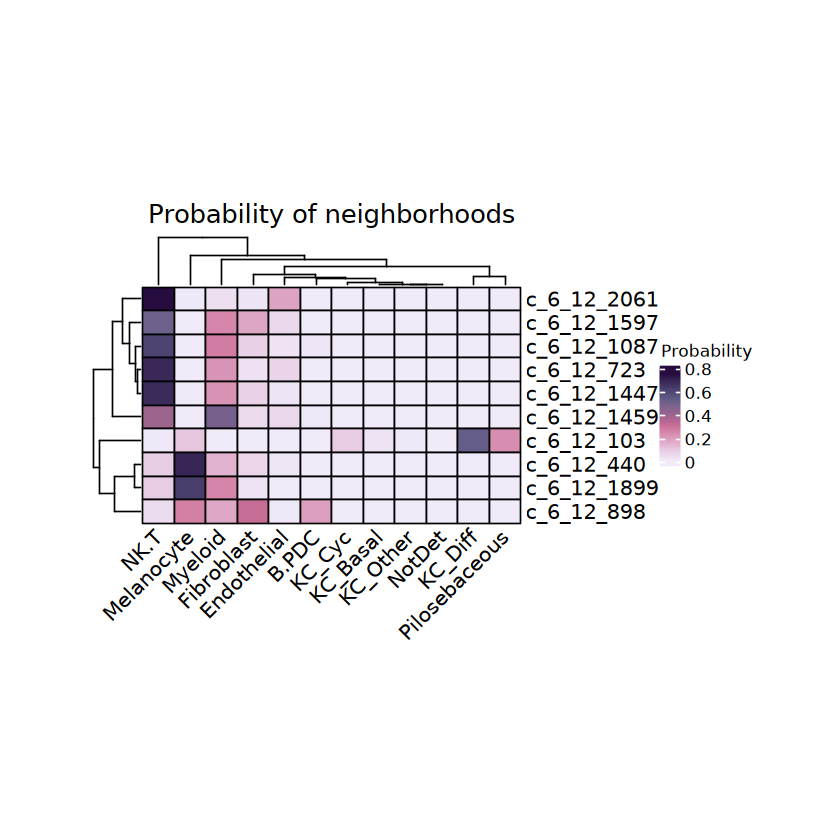

In [11]:
# perform neighborhood analysis to genereate a matrix 
# with the probability of each cell associating with their 100 nearest cells.
pm <- scanHoods(fnc$distance) 
hoods <- mergeByGroup(pm, fnc$cells)
plotHoodMat(hoods, n = 10, hm_height = 5,hm_width = 8)

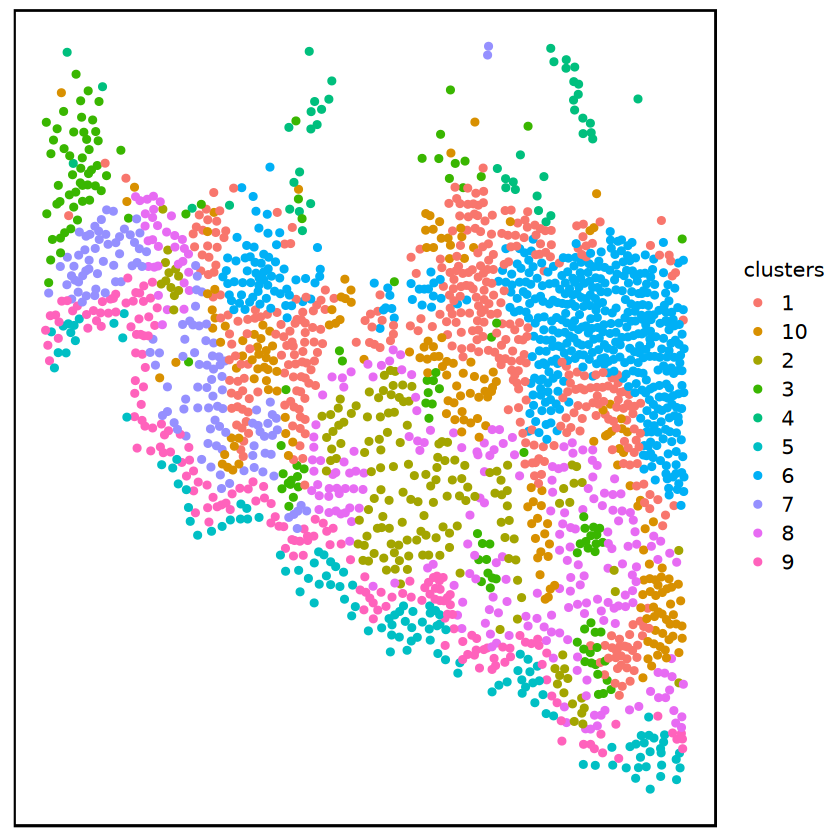

In [12]:
spe <- mergeHoodSpe(spe, hoods)
spe <- calcMetrics(spe, pm_cols = colnames(hoods))
spe <- clustByHood(spe, pm_cols = colnames(hoods), k = 10)
plotTissue(spe, color = clusters)

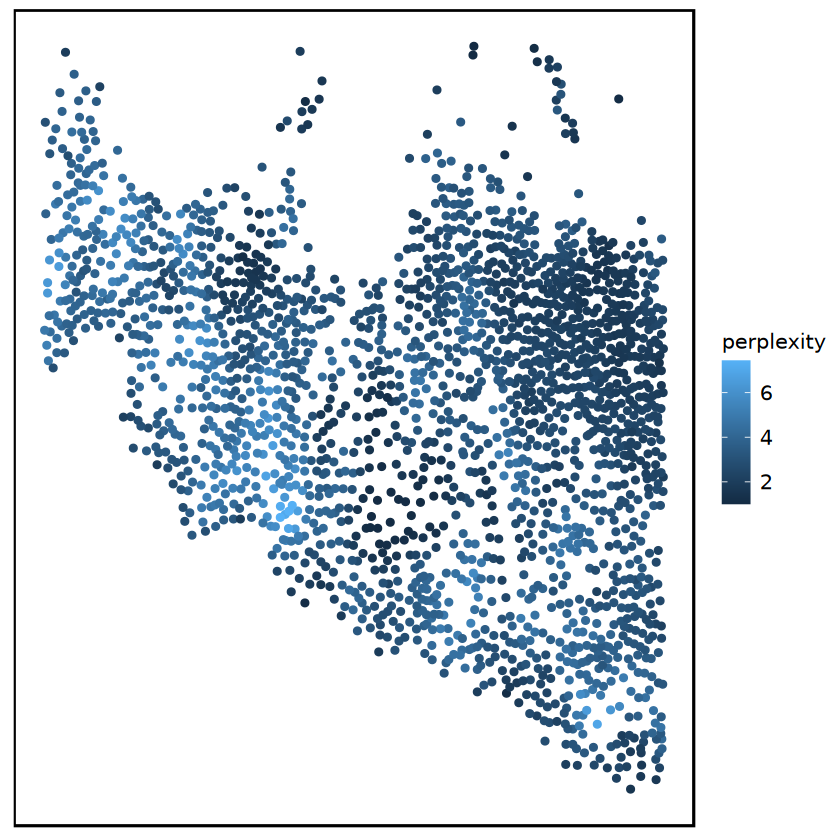

In [13]:
# entropy and perplexity measure the mixture of neighborhood of each cell
plotTissue(spe, size = 1.5, color = perplexity) 

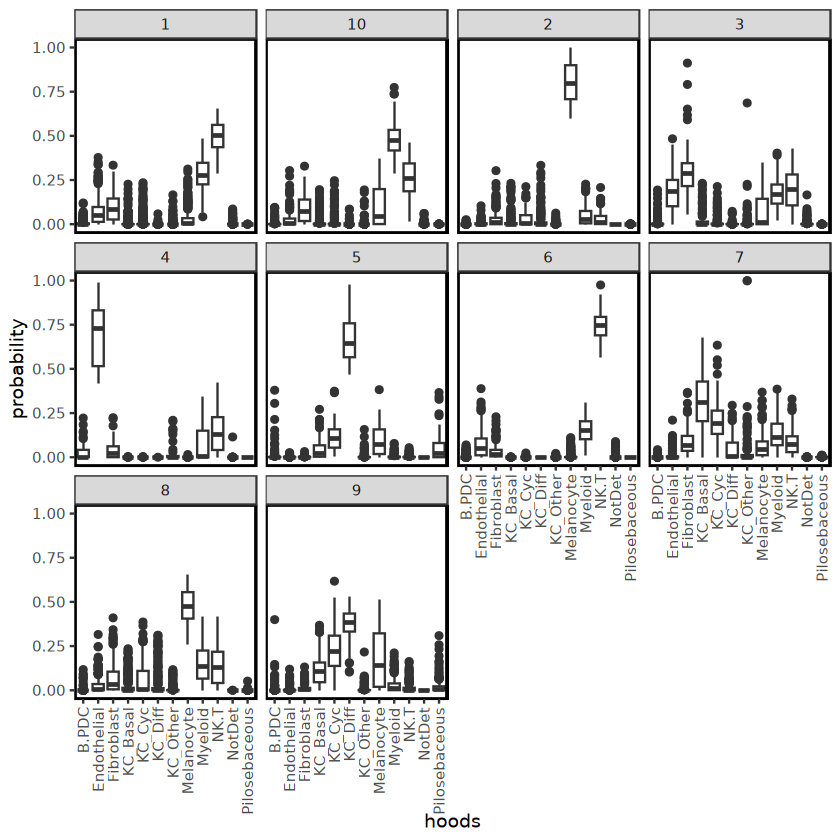

In [14]:
plotProbDist(spe, pm_cols = colnames(hoods), by_cluster = TRUE, plot_all = TRUE, show_clusters = as.character(seq(10)))

In [15]:
write.csv(spatial,file = 'spatial.csv',row.names=F,col.names=T,quote=F)

Warning message in write.csv(spatial, file = "spatial.csv", row.names = F, col.names = T, :
“attempt to set 'col.names' ignored”
